In [16]:
#all imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import csv
import imageio

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from keras import backend as K
from keras.optimizers import SGD
from keras import regularizers


In [17]:
K.set_image_dim_ordering('th')
seed = 7
np.random.seed(seed)

In [18]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def readimagesfromfolder(path, color, show):
	imagepackage_list = []
	imagepackage = []
	imagelist = []
	filelist = sorted(os.listdir(path))
	for filename in filelist:
		fullfilename =  path + filename
		#print(fullfilename)        
		singleimage = imageio.imread(fullfilename)
		singleimage = cv2.resize(singleimage,(96,96), interpolation=cv2.INTER_AREA)        
		singleimage = rgb2gray(singleimage)
		#print(singleimage)        
		if show==1:
			plt.imshow(singleimage)
			plt.show()
		imagepackage.append(singleimage)
		imagepackage_list.append(imagepackage)        
		imagepackage = []        
	#print(len(imagepackage))        
	imagepackage_list = np.float32(imagepackage_list)
	#cv2.destroyAllWindows()
	return imagepackage_list

def readlabelfromcsv(filename):
    training_y = []
    with open(filename) as f:
        #training_y.append(f.readline())
        content = csv.reader(f)
        for line in content:
            #print(line[0])
            training_y.append(int(line[0]))
    return training_y




In [ ]:

main_folder[0] = 'data/blonds'       
main_folder[1] = 'data/basic'
main_folder[2] = 'data/extended'

def prepare_all_data(datafolder):

    training_folderpath = datafolder + '/training/'
    X_train=readimagesfromfolder(folderpath, 0, 0)
    print(np.shape(X_train))

    test_folderpath = datafolder + '/test/'
    X_test=readimagesfromfolder(folderpath, 0, 0)
    print(np.shape(X_test))

    y_train = readlabelfromcsv(datafolder + "/training.csv")
    y_test = readlabelfromcsv(datafolder + "/test.csv")

    # normalize inputs from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # one hot encode outputs
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]

    return X_train, X_test, y_train, y_test, num_classes


datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,# randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.2,
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    fill_mode="constant", 
    cval=0) # randomly flip images

#datagen.fit(X_train)

Epoch 1/100
Epoch 00000: val_acc improved from -inf to 0.64583, saving model to lastversion_00_0.65.hd5
32s - loss: 0.9748 - acc: 0.5148 - val_loss: 0.7095 - val_acc: 0.6458
Epoch 2/100
Epoch 00001: val_acc improved from 0.64583 to 0.87500, saving model to lastversion_01_0.88.hd5
21s - loss: 0.7109 - acc: 0.6963 - val_loss: 0.5141 - val_acc: 0.8750
Epoch 3/100
Epoch 00002: val_acc did not improve
20s - loss: 0.5407 - acc: 0.7752 - val_loss: 0.6638 - val_acc: 0.7500
Epoch 4/100
Epoch 00003: val_acc did not improve
20s - loss: 0.4315 - acc: 0.8252 - val_loss: 0.5556 - val_acc: 0.7917
Epoch 5/100
Epoch 00004: val_acc did not improve
20s - loss: 0.3420 - acc: 0.8650 - val_loss: 0.3244 - val_acc: 0.8750
Epoch 6/100
Epoch 00005: val_acc did not improve
20s - loss: 0.2645 - acc: 0.9040 - val_loss: 0.5288 - val_acc: 0.8125
Epoch 7/100
Epoch 00006: val_acc did not improve
20s - loss: 0.2018 - acc: 0.9265 - val_loss: 0.5191 - val_acc: 0.8125
Epoch 8/100
Epoch 00007: val_acc did not improve
21s -

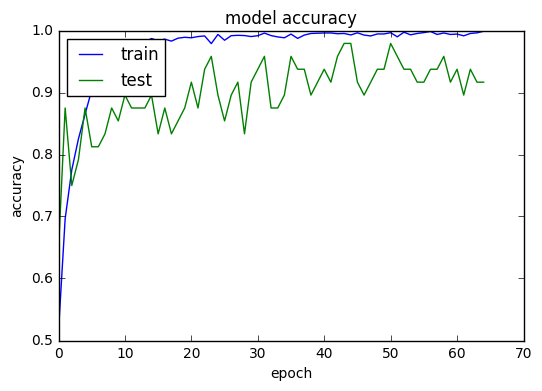

[0.83147618671258294, 0.91666666666666663]
Baseline Error: 8.33%


In [21]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Convolution2D(16, 3, 1, border_mode='same', input_shape=(1, 96, 96), activation='relu'))
	model.add(Convolution2D(24, 5, 1, border_mode='same', activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Convolution2D(32, 5, 3, border_mode='same', activation='relu'))
	model.add(Convolution2D(48, 5, 3, border_mode='same', activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(1000, activation='relu'))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = larger_model()
filename = "lastversion_epoch_{epoch:02d}_val_acc_{val_acc:.2f}.hd5"

earlystopping = EarlyStopping(monitor = "val_acc", patience = 20, verbose=1, mode="auto")
checkpoint = ModelCheckpoint(filename, monitor = "val_acc", verbose =1, mode="auto", save_best_only = "True")

list_of_callbacks = [earlystopping, checkpoint]

# Fit the model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=25), callbacks = list_of_callbacks, samples_per_epoch = 5000, nb_epoch = 100, verbose=2, validation_data=(X_test, y_test))
#model.save("chybadobry.hd5")
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("model accuracy")

plt.legend(["train", "test"], loc="upper left")
plt.show()

print scores
print("Baseline Error: %.2f%%" % (100-scores[1]*100))